<a href="https://colab.research.google.com/github/roxin/psm-machine-learning/blob/master/Regression_lineaire_avec_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fonctions de régression avec Scikit-Learn

In [ ]:
# Importation des bibliotéques
# Python ≥3.5 est exigé 
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 est exigé
import sklearn
assert sklearn.__version__ >= "0.20"

# Bibliothéques standards
import numpy as np
import os

# Pour visualisation des données
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Régression linéaire

In [ ]:
# Simulation des données 
m = 100  # augmenter le nombre d'échantillons à 1000 ou 10000
X = 6 * np.random.rand(m, 1) - 3
y = 2 + 4 * X + np.random.randn(m, 1)

In [ ]:
# choix du modèle
from sklearn.linear_model import LinearRegression
modele_lin_reg = LinearRegression()
modele_lin_reg.fit(X, y)
modele_lin_reg.intercept_, modele_lin_reg.coef_

(array([1.96794402]), array([[3.9665215]]))

In [ ]:
# Prévisions 
X_new = np.array([[0.3], [1.4], [2.7] ])
y_predict = modele_lin_reg.predict(X_new)

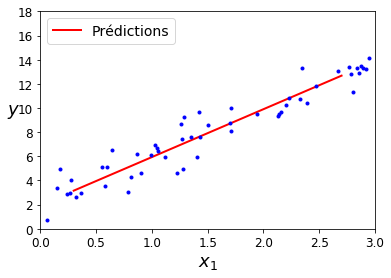

In [ ]:
# Visualisation des données
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Prédictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 3, 0, 18])
plt.show()

## Régression polynomiale

\begin{equation*}
y = \theta_0 + \theta_1 * x + \theta_2 * x ** 2
\end{equation*}

In [ ]:
# Simulation des données
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

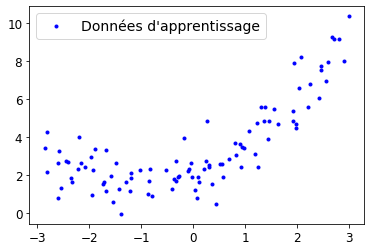

In [ ]:
# Visualisation des données
plt.plot(X, y, "b.", label="Données d'apprentissage")
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [ ]:
# choix du modèle
# la classe PolynomialFeatures de Scikit-Learn
# polynômes du second degré
from sklearn.preprocessing  import PolynomialFeatures
modele_poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = modele_poly_features.fit_transform(X)
# X_poly contient la variable originelle de X et le carré de celle-ci [x, x**2]
print(X[0])
print(X_poly[0])

[-2.82048691]
[-2.82048691  7.95514642]


In [ ]:
# adapter le modèle de régression linéaire à X_poly
modele_lin_reg = LinearRegression()
modele_lin_reg.fit(X_poly, y)
modele_lin_reg.intercept_, modele_lin_reg.coef_

(array([2.08055439]), array([[1.00509009, 0.48556474]]))

2,081 + 1,005 * X + 0,486 X**2  vs. 2 + X + 0.5*X**2

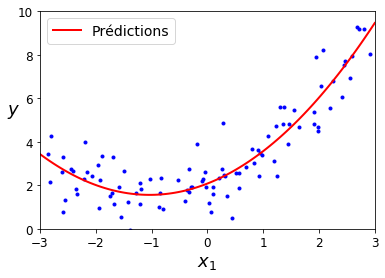

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = modele_poly_features.transform(X_new)
y_new = modele_lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Prédictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### Les courbes d’apprentissage

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

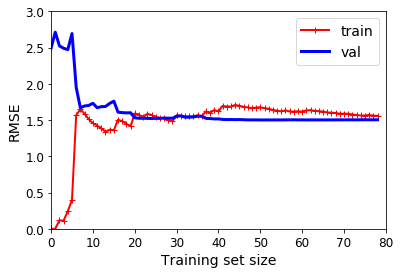

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()  

Les courbes d’apprentissage sont caractéristiques pour un modèle qui sous-ajuste : les deux courbes atteignent un plateau, elles sont proches et relativement hautes.

Solution : 
1. choisir un modèle plus complexe 

2. trouver de meilleures variables.

### Un modèle polynomial de degré 10 sur les mêmes données (solution 1)

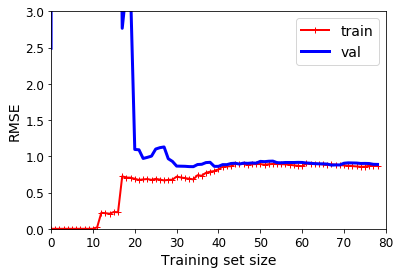

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown